In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score
import seaborn as sns

from sklearn.svm import SVC

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("email.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
X = df['Message']
Y = df['spam']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

# Naive Bayes


In [6]:
naive_bayes = Pipeline([('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [7]:
naive_bayes.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [8]:
Y_pred_NB = naive_bayes.predict(X_test)

In [25]:
accuracy = []
acc_nb = accuracy_score(Y_test, Y_pred_NB)
accuracy.append(acc_nb*100)
print(acc_nb)

0.9878048780487805


In [26]:
conf_matrix = confusion_matrix(Y_test, Y_pred_NB)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1210
           1       0.97      0.94      0.95       184

    accuracy                           0.99      1394
   macro avg       0.98      0.97      0.97      1394
weighted avg       0.99      0.99      0.99      1394



<Axes: >

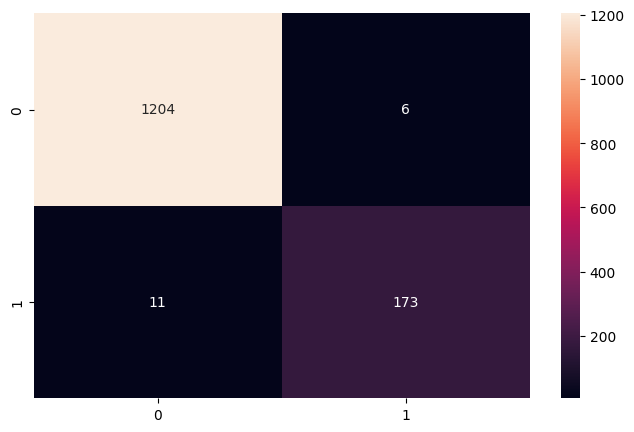

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')


# SVM

In [28]:
clf_svm = Pipeline([('vectorizer', CountVectorizer()),
                    ('svc', SVC(kernel='linear'))
                    ])

In [29]:
clf_svm.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(kernel='linear'))])

In [30]:
Y_pred_svm = clf_svm.predict(X_test)

In [31]:
acc_svm = accuracy_score(Y_test, Y_pred_svm)
accuracy.append(acc_svm*100)
print(acc_svm)

0.9878048780487805


In [32]:
svm_confusion_matrix = confusion_matrix(Y_test, Y_pred_svm)
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1210
           1       0.99      0.92      0.95       184

    accuracy                           0.99      1394
   macro avg       0.99      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394



<Axes: >

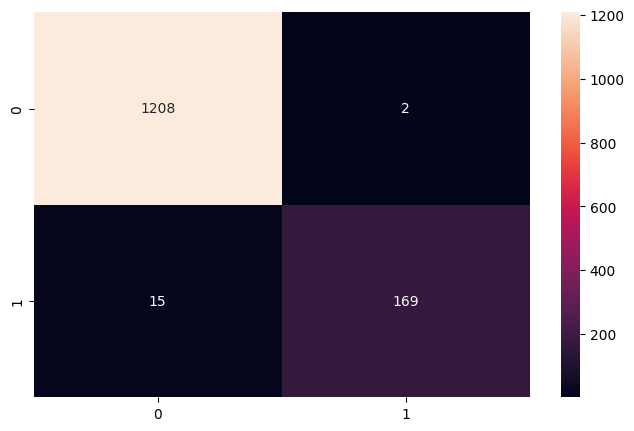

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d')

# Decission Tree

In [34]:
dt_clf = Pipeline([('vectorizer', CountVectorizer()), ('dt', DecisionTreeClassifier())])
dt_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [35]:
Y_pred_DT = dt_clf.predict(X_test)
acc_DT = accuracy_score(Y_test, Y_pred_DT)
accuracy.append(acc_DT*100)
print(acc_DT)

0.9748923959827833


In [36]:
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1210
           1       0.91      0.90      0.90       184

    accuracy                           0.97      1394
   macro avg       0.95      0.94      0.94      1394
weighted avg       0.97      0.97      0.97      1394



<Axes: >

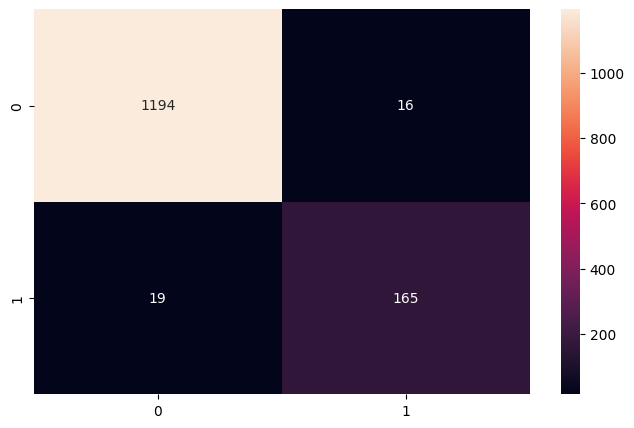

In [37]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_DT)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d')

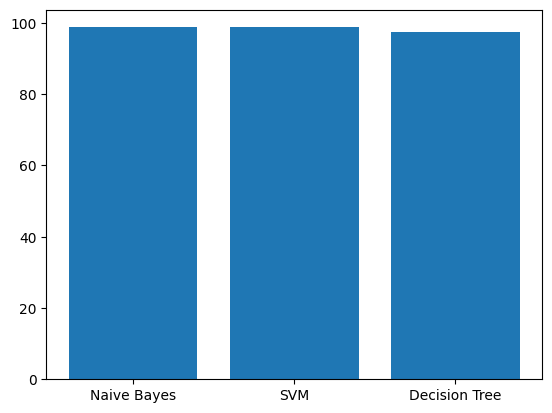

In [40]:
x = (['Naive Bayes', 'SVM', 'Decision Tree'])
y = (accuracy)
plt.bar(x,y)
plt.show()

In [90]:
def check(clf, txt):
    a = clf.predict([txt])
    if a==1:
        print("Spam")
    else:
        print("Not Spam")

In [91]:
text1 = r"Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!"

text2 = r" investors are advised to stay away from such fraudulent investment schemes/apps promising unrealistic returns. Investors are also advised to refer the following link of CDSl"

In [93]:
check(naive_bayes, text1)

Spam
